In [1]:
# make necessary imports

import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df=pd.read_csv(r'F:\NLP\Projects\fake-news-detection-master/fake_or_real_news.csv')

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
# distribution of classes for prediction
def create_distribution(dataFile):
    return sns.countplot(x='label', data=dataFile, palette='hls')

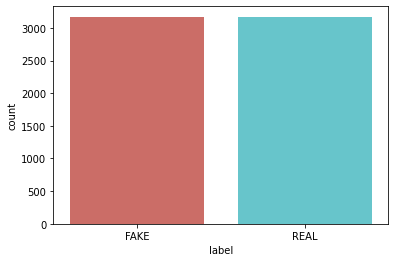

In [5]:
create_distribution(df)

In [6]:
# data integrity check (missing label values)

In [ ]:
def data_qualityCheck():
    print("Checking data qualitites...")
    df.isnull().sum()
    df.info()  
    print("check finished.")
data_qualityCheck()

In [8]:
# the dataset does not contains missing values therefore no cleaning required

In [9]:
# Separate the labels and set up training and test datasets

# Get the labels
x=df['text']
y = df['label']
y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [10]:
#Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=53)

In [11]:
### before applying ML algorithm, we have to convert our text data into numbers or vector representation

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
count_vectorizer = CountVectorizer(stop_words='english')

In [14]:
# Fit and transform the training data 
# Learn the vocabulary dictionary and return term-document matrix

count_train = count_vectorizer.fit_transform(X_train)

In [ ]:
count_vectorizer

### get CountVectorizer_stats

In [21]:
#vocab size
print(count_train.shape)

(4244, 56922)


In [ ]:
#check vocabulary using below command
print(count_vectorizer.vocabulary_)

In [17]:
# Transform the test set

count_test = count_vectorizer.transform(X_test)

In [18]:
# create tf-df frequency features
# Initialize a TfidfVectorizer

# max_df removes words which appear in more than 70% of the articles

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [19]:
# Fit and transform train set, transform test set

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

In [20]:
tfidf_train.shape

(4244, 56922)

In [ ]:
#get train data feature names 
tfidf_train

In [28]:
## print first 10 rows
tfidf_train.A[0:10]

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.0121467, 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.0165804, 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [29]:
# Transform the test set 

tfidf_test = tfidf_vectorizer.transform(X_test)

In [ ]:

# building classifier using naive bayes 
# Naive Bayes classifier for Multinomial model

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import KFold
import itertools

In [ ]:
## it means very first I have to apply tfidf_vectorizer, then I have to apply MultinomialNB on data

nb_pipeline = Pipeline([
        ('NBTV',tfidf_vectorizer),
        ('nb_clf',MultinomialNB())])

In [ ]:
nb_pipeline.fit(X_train,y_train)

In [33]:
# Perform classification on an array of test vectors X

predicted_nbt = nb_pipeline.predict(X_test)

In [34]:
predicted_nbt

array(['REAL', 'REAL', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype='<U4')

In [ ]:
### checking score of the model

In [35]:
score = metrics.accuracy_score(y_test, predicted_nbt)
print('Accuracy:{}'.format(round(score*100,2)))

Accuracy:85.65


In [36]:
confusion_matrix(y_test,predicted_nbt)

array([[ 739,  269],
       [  31, 1052]], dtype=int64)

### lets try with count vectorizer & Multinomial NB

In [37]:
nbc_pipeline = Pipeline([
        ('NBCV',count_vectorizer),
        ('nb_clf',MultinomialNB())])

In [ ]:
nbc_pipeline.fit(X_train,y_train)

In [40]:
predicted_nbc = nbc_pipeline.predict(X_test)
score = metrics.accuracy_score(y_test, predicted_nbc)
print('Accuracy:{}'.format(round(score*100,2)))

Accuracy:89.34


In [41]:
confusion_matrix(y_test,predicted_nbc)

array([[ 865,  143],
       [  80, 1003]], dtype=int64)

In [ ]:
# building Passive Aggressive Classifier 
# Applying Passive Aggressive Classifier

# Initialize a PassiveAggressiveClassifier
linear_clf = Pipeline([
        ('linear',tfidf_vectorizer),
        ('pa_clf',PassiveAggressiveClassifier(max_iter=50))])
linear_clf.fit(X_train,y_train)

In [43]:
#Predict on the test set and calculate accuracy

pred = linear_clf.predict(X_test)


In [44]:
score = metrics.accuracy_score(y_test, pred)
print('Accuracy:{}'.format(round(score*100,2)))

Accuracy:93.5


In [45]:
confusion_matrix(y_test,pred)

array([[957,  51],
       [ 85, 998]], dtype=int64)

In [46]:
## creating a classification report
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

        FAKE       0.92      0.95      0.93      1008
        REAL       0.95      0.92      0.94      1083

    accuracy                           0.93      2091
   macro avg       0.93      0.94      0.93      2091
weighted avg       0.94      0.93      0.93      2091



In [57]:
# saving best model to the disk
import pickle

# open a file, where you want to store the data
file=open(r'F:\NLP\Projects\fake-news-detection-master/final_model.sav','wb')



In [58]:
# dump information to that file
pickle.dump(linear_clf,file)

#wait for 2-3 mins to save your model to your disk

In [ ]:
### testing on some custom data

In [61]:

# function to run for prediction
def detecting_fake_news(var):  
    
    #retrieving the best model for prediction 
    ## load your sav model
    model=open(r'F:\NLP\Projects\fake-news-detection-master/final_model.sav','rb')
    load_model=pickle.load(model)
    prediction = load_model.predict([var])

    return (print("The given statement is ",prediction[0]))



In [63]:
import pickle
var = input("Please enter the news text you want to verify: ")
detecting_fake_news(var)

Please enter the news text you want to verify: hye
The given statement is  FAKE
